# Forecasts

The main goal in this notebook is to generate an estimate for the future 25 years of wildfires. For this I have used ARIMA from statsmodel to do the forecasting. The target variable is Score which we have generated and this is the only variable that will be used. 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA

In [3]:
combined_df = pd.read_csv('/Users/apple/Desktop/DATA_512/Wildfire-Analysis/data/aqi_score_combined.csv')

In [4]:
combined_df.tail()

,Unnamed: 0,Year,AQI,Score
35,26,2016,28.046326,4.674749
36,27,2017,27.271429,6.361451
37,28,2018,32.929434,5.565526
38,29,2019,31.313559,2.029475
39,30,2020,29.459538,3.362018


I have set the value of p as 20. P is basically the previous years trends used to make a prediction for future. For d i have selected 1. d is basically the moving average. more information on it can be found on the following link: https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html

In [5]:

# Determine the order (p, d, q) for the ARIMA model using analysis

# Fit the ARIMA model
arima_order = (20,1,0)  # Replace with your chosen values
arima_model = ARIMA(combined_df['Score'], order=arima_order)
arima_results = arima_model.fit()

# Make predictions (e.g., forecasting the next 12 time points)
forecast_period = 25  # Change this as needed
forecasted_values = arima_results.forecast(steps=forecast_period)


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [6]:
forecasted_values

40    7.827502
41    4.086919
42    7.541861
43    4.547139
44    2.457313
45    9.297946
46    6.097816
47    3.167518
48    3.461795
49    5.215364
50    4.443486
51    3.302716
52    2.322469
53    3.836339
54    3.825244
55    8.799119
56    3.861214
57    3.565451
58    5.116769
59    4.425062
60    6.395672
61    4.040434
62    2.579300
63    5.541824
64    6.111187
Name: predicted_mean, dtype: float64

I have converted the forecast output into a dataframe and added years to it. Since the last datapoint we had was for 2020. The years in prediction start from 2021 and till 2045. 

In [7]:
df_forecasted = pd.DataFrame(forecasted_values)

In [8]:
# Add a new column with a sequence of years
df_forecasted['Year'] = range(combined_df['Year'].max() + 1, combined_df['Year'].max() + 1 + len(df_forecasted))

# Display the modified DataFrame
df_forecasted

,predicted_mean,Year
40,7.827502,2021
41,4.086919,2022
42,7.541861,2023
43,4.547139,2024
44,2.457313,2025
45,9.297946,2026
46,6.097816,2027
47,3.167518,2028
48,3.461795,2029
49,5.215364,2030


I have made a visualisation of the forecast for the next 25. The forecasted part can be seen colored red and the calculated score part can be seen in blue. I can see over here that even though with this limited data the ARIMA model is capturing some variation in the previous trends. 

In [9]:
# Combine data frames based on the 'year' column
result_df = pd.concat([combined_df, df_forecasted])
#Create a new column to get the combined values of our calculated scores and predicted scores
result_df['actual_forecasted_combined'] = result_df['predicted_mean']
result_df['actual_forecasted_combined'].fillna(result_df['Score'], inplace = True)

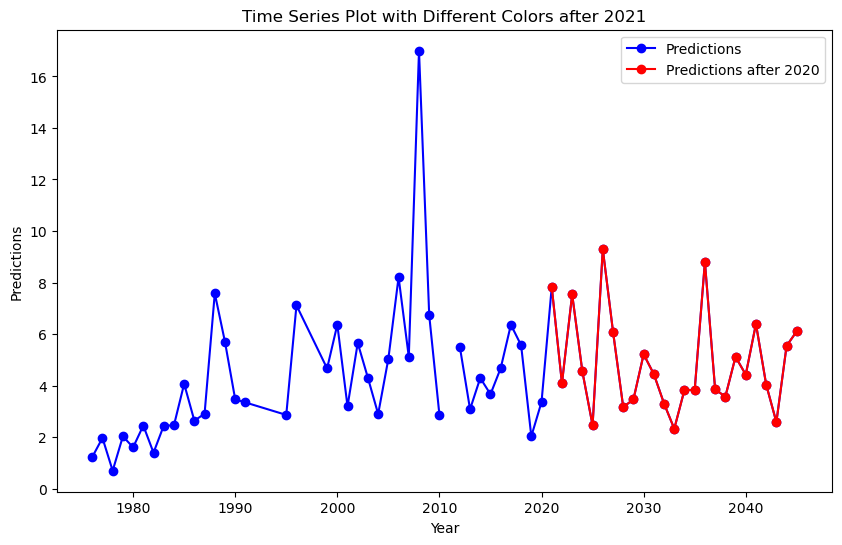

In [10]:
window = 3  # Adjust the window size as needed
result_df['moving_average'] = result_df['actual_forecasted_combined'].rolling(window=window).mean()

# Create the time series plot with different colors after 2021
plt.figure(figsize=(10, 6))

# Plot the entire line with a single color
plt.plot(result_df['Year'], result_df['actual_forecasted_combined'], marker='o', color='blue', label='Predictions')

# Highlight data points after 2021 with a different color
after_2021 = result_df[result_df['Year'] > 2020]
plt.plot(after_2021['Year'], after_2021['actual_forecasted_combined'], marker='o', color='red', label='Predictions after 2020')

# Plot the moving average line in a different color
#plt.plot(result_df['Year'], result_df['moving_average'], color='green', label=f'{window}-Year Moving Average')

plt.xlabel('Year')
plt.ylabel('Predictions')
plt.title('Time Series Plot with Different Colors after 2021')
plt.legend()

plt.show()